In [2]:
# 添加目录到系统路径方便导入模块，该项目的根目录为".../machine-learning-toy-code"
import sys
from pathlib import Path
curr_path = str(Path().absolute())
parent_path = str(Path().absolute().parent)
p_parent_path = str(Path().absolute().parent.parent)
sys.path.append(p_parent_path) 
print(f"主目录为：{p_parent_path}")

主目录为：d:\py\pycharmProjects\MachineLearning\ML_Sklearn_code


In [3]:
# 下面为sci-kit版本

import numpy as np
from sklearn.datasets import fetch_openml

# 数据
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']
X_train = np.array(X[:60000], dtype=float)
y_train = np.array(y[:60000], dtype=float)
X_test = np.array(X[60000:], dtype=float)
y_test = np.array(y[60000:], dtype=float)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

KeyboardInterrupt: 

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
print("Test score with L1 penalty: %.4f" % score)

In [ ]:
# 下面为pytorch版本

In [14]:
from torch.utils.data import DataLoader
from torchvision import datasets
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

torch.Size([100, 1, 28, 28])
tensor([[5, 0, 4, 2, 1, 0, 2, 8, 7, 3],
        [9, 6, 7, 5, 1, 9, 0, 3, 4, 4],
        [8, 8, 5, 0, 6, 0, 0, 3, 5, 4],
        [1, 2, 3, 2, 0, 3, 4, 2, 5, 3],
        [7, 8, 4, 8, 9, 2, 3, 3, 4, 3],
        [5, 9, 9, 7, 7, 6, 7, 9, 6, 0],
        [1, 1, 1, 3, 2, 5, 4, 0, 3, 2],
        [7, 4, 7, 7, 9, 3, 9, 6, 5, 3],
        [6, 2, 2, 9, 6, 8, 1, 7, 0, 9],
        [8, 9, 6, 0, 5, 3, 5, 6, 2, 2]])
(302, 302, 3)


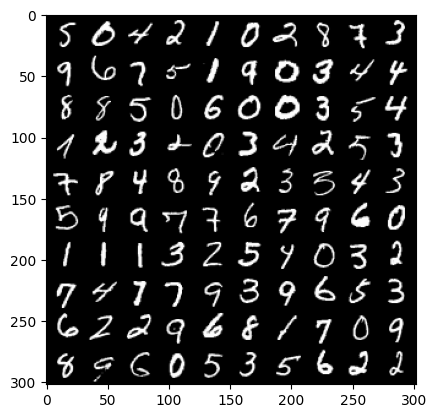

In [15]:
train_dataset = datasets.MNIST(root = p_parent_path+'/datasets/', train = True,transform = transforms.ToTensor(), download = False)
test_dataset = datasets.MNIST(root = p_parent_path+'/datasets/', train = False, 
                               transform = transforms.ToTensor(), download = False)

batch_size = len(train_dataset)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)
X_train,y_train = next(iter(train_loader))
X_test,y_test = next(iter(test_loader))
# 打印前100张图片
images, labels= X_train[:100], y_train[:100] 
# 使用images生成宽度为10张图的网格大小
img = torchvision.utils.make_grid(images, nrow=10)
# cv2.imshow()的格式是(size1,size1,channels),而img的格式是(channels,size1,size1),
# 所以需要使用.transpose()转换，将颜色通道数放至第三维
img = img.numpy().transpose(1,2,0)
print(images.shape)
print(labels.reshape(10,10))
print(img.shape)
plt.imshow(img)
plt.show()

In [16]:
X_train,y_train = X_train.cpu().numpy(),y_train.cpu().numpy() # tensor转为array形式)
X_test,y_test = X_test.cpu().numpy(),y_test.cpu().numpy() # tensor转为array形式)

In [17]:
X_train = X_train.reshape(X_train.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [18]:
# solver：即使用的优化器，lbfgs：拟牛顿法， sag：随机梯度下降
model = LogisticRegression(solver='lbfgs', max_iter=400) # lbfgs：拟牛顿法
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred)) # 打印报告

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.90      0.92      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.94      0.94       982
           5       0.89      0.87      0.88       892
           6       0.94      0.95      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.88      0.88      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.93      0.93      0.93     10000



In [19]:
ones_col_train = [[1] for i in range(len(X_train))]  # 长度与X_train相同
ones_col_test = [[1] for i in range(len(X_test))]    # 长度与X_test相同

X_train = np.append(X_train, ones_col_train, axis=1)
x_train = X_train

X_test = np.append(X_test, ones_col_test, axis=1)
x_test = X_test

# 二分类任务处理
y_train = np.array([1 if y_train[i] == 1 else 0 for i in range(len(y_train))])
y_test = np.array([1 if y_test[i] == 1 else 0 for i in range(len(y_test))])

In [ ]:
print("X_train original shape:", X_train.shape)  # 应该是 (60000, 784)
print("X_test original shape:", X_test.shape)    # 应该是 (10000, 784)
# solver：即使用的优化器，lbfgs：拟牛顿法， sag：随机梯度下降
model = LogisticRegression(solver='lbfgs', max_iter=100) # lbfgs：拟牛顿法
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred)) # 打印报告

X_train original shape: (60000, 785)
X_test original shape: (10000, 785)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8865
           1       0.97      0.98      0.97      1135

    accuracy                           0.99     10000
   macro avg       0.98      0.99      0.98     10000
weighted avg       0.99      0.99      0.99     10000

